In [1]:
import sys
sys.path += [".."]

import smbh
from math import *
import numpy as np
from scipy.special import erf
from scipy.optimize import fsolve

import matplotlib.pyplot as plt

from glob import glob

# Sound speed

$$
    c_s = \sqrt{\dfrac{\gamma R}{\mathcal{M}_w}T_\text{vir}} = \sqrt{\dfrac{\gamma R}{\mathcal{M}_w}\left(\dfrac{\mu m_p G M_h}{2k_BR_\text{vir}}\right)} = \sqrt{\dfrac{\gamma R\mu m_pG}{2\mathcal{M}_wk_B}} \sqrt{\dfrac{M_h}{R_\text{vir}}} \approx 0.614 \sqrt{\dfrac{M_h}{R_\text{vir}}}\text{ kpcGyr$^{-1}$}
$$

In [2]:
from scipy.constants import m_p, k, R
smbh.SOLAR_MASSES * 1e5, m_p

mu = 1.1
gamma = 5 / 3

f = ((gamma * R * mu * m_p * smbh.G) / (2 * k * (mu / 1000)))
f = f ** 0.5
print(f, f * (1e3 / smbh.R_VIR_z20) ** 0.5)

0.6141441129704023 23.38051630990129


In [3]:
def soundSpeedChoksi(mh, z):
    kms = 1.8 * (1 + z) ** 0.5 * (mh / 100) ** (1/3) * (0.304 * (0.678 ** 2) / 0.14) ** (1 / 6)
    return smbh.kmsTokpcGyr(kms)

In [4]:
soundSpeedChoksi(1e3, 20)

18.169224634725687

# Mach function zero

$$
    \ln\Lambda\left[1.5\left(\erf{\dfrac{\mathcal{M}}{\sqrt{2}}} - \sqrt{\dfrac{2}{\pi}}\mathcal{M}e^{-\mathcal{M}^2/2}\right) - 1\right] - 0.5\ln\left(1 - \mathcal{M}^{-2}\right) = 0
$$

In [5]:
def mach(m, lnL = 2.3):
    factor = erf(m / sqrt(2)) - sqrt(2 / np.pi) * m * np.exp(-(m ** 2) / 2)
    f1 = 1.5 * lnL * factor
    f2 = 0.5 * np.log(1 - (m ** -2)) + lnL
    return f1 - f2

fsolve(mach, 1.7)

array([1.73100478])

# Scale length approx
$$
	\mathcal{R}_s = \dfrac{0.01}{\left(1 + \sqrt{2}\right)}\left({\dfrac{M_hG}{100 H(t)^2}}\right)^{1/3}
$$

In [6]:
a = 0.01 / (1 + sqrt(2)) * (smbh.G / 100) ** (1/3)
print("%e" % a)

6.835160e-04


# Density profiles

4


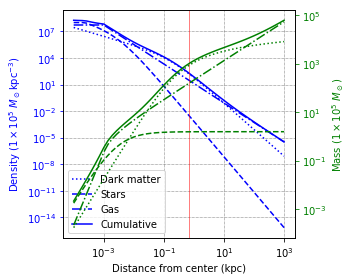

In [7]:
r = np.logspace(-4, 3)

smbh.setBaryonicFraction(0.156)
smbh.setGasPower(-2.2)

smbh.setStellarRatio(0.01)
fig, axs = smbh.plotDensityMassForAll(r, figsize = (5, 4))
fig.savefig("density_mass_fs01.png", dpi = 300)

4


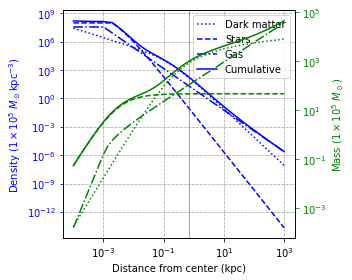

In [8]:
smbh.setStellarRatio(0.3)
fig, axs = smbh.plotDensityMassForAll(r, figsize = (5, 4))
fig.savefig("density_mass_fs3.png", dpi = 300)

# Single orbits

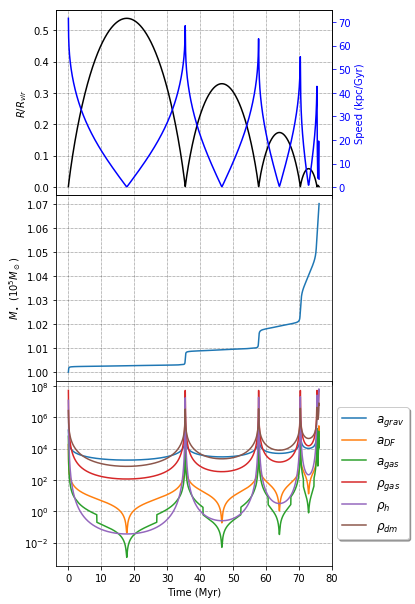

In [9]:
v0 = 70 * 1.023 # to kpc / gyr

smbh_m = 1

smbh.setStellarRatio(0.01)

smbh.setGasPower(-2.2)
result = smbh.run([v0, 0, 0], smbh_m, save_every = 10)

fig, (ax1, ax2, ax3) = smbh.plotProperties(result)

# fig.savefig('properties_s01v70.png', dpi = 300)

plt.show()

# Power law

In [10]:
v0 = 70 # to kpc / gyr

smbh_m = 1

smbh.setStellarRatio(0.01)

In [11]:
r = np.logspace(-4, 3)
powers = [-1.8, -1.9, -2, -2.1, -2.2, -2.3]

results = []
ds = []
ms = []

for power in powers:
    smbh.setGasPower(power)
    result = smbh.run([v0, 0, 0], smbh_m, save_every = 10)
    results.append(result)
    ds.append(smbh.gasDensity(r))
    ms.append(smbh.gasMass(r))

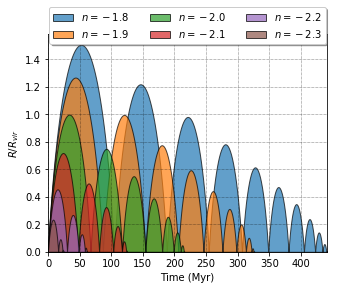

In [12]:
labels = ["$n = %.1f$" % n for n in powers]
fig, ax = smbh.plotOrbits(results)

smbh.coolLegend(ax, labels, ncol = 3)

fig.savefig("power_law.png", dpi = 300)
plt.show()

4


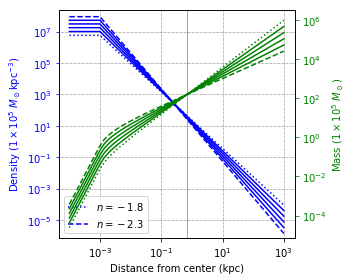

In [13]:
fig, (ax1, ax2) = smbh.plotDensityMass(r, ds[1:-1], ms[1:-1], lines = None, figsize = (5, 4))

ax1.plot(r, ds[0], ":", c = "b", label = "$n = %.1f$" % powers[0])
ax1.plot(r, ds[-1], "--", c = "b", label = "$n = %.1f$" % powers[-1])

ax2.plot(r, ms[0], ":", c = "g")
ax2.plot(r, ms[-1], "--", c = "g")

ax1.legend(loc = 3)

fig.savefig("power_law_density.png", dpi = 300)